#**Author: Sachet Utekar**#

##**Task - Music Recommendation System**##

##**Dataset - https://www.kaggle.com/c/kkbox-music-recommendation-challenge/data**##

##**Importing Libraries**##

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
from scipy.sparse import csr_matrix

##**Importing Dataset**##

In [ ]:
dataset = pd.read_csv('/content/featuresdf.csv')
dataset.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


##**Analysing the Dataset**##

In [ ]:
dataset.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00
mean,0.69682,0.660690,5.570000,-5.652650,0.580000,0.103969,0.166306,0.004796,0.150607,0.517049,119.202460,218387.28000,3.99
std,0.12508,0.139207,3.731534,1.802067,0.496045,0.095115,0.166730,0.026038,0.079011,0.216436,27.952928,32851.07772,0.10
min,0.25800,0.346000,0.000000,-11.462000,0.000000,0.023200,0.000259,0.000000,0.042400,0.086200,75.016000,165387.00000,3.00
25%,0.63500,0.556500,2.000000,-6.594500,0.000000,0.043125,0.039100,0.000000,0.098275,0.375500,99.911750,198490.50000,4.00
50%,0.71400,0.667500,6.000000,-5.437000,1.000000,0.062650,0.106500,0.000000,0.125000,0.502500,112.468000,214106.00000,4.00
75%,0.77025,0.787500,9.000000,-4.326750,1.000000,0.123000,0.231250,0.000013,0.179250,0.679000,137.166000,230543.00000,4.00
max,0.92700,0.932000,11.000000,-2.396000,1.000000,0.431000,0.695000,0.210000,0.440000,0.966000,199.864000,343150.00000,4.00


In [ ]:
dataset.isnull().sum()

id                  0
name                0
artists             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [ ]:
dataset.dtypes

id                   object
name                 object
artists              object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
time_signature      float64
dtype: object

In [ ]:
print(f"There are {dataset.shape[0]} observations in the dataset")

There are 100 observations in the dataset


In [ ]:
unique_artists = dataset['artists'].unique().shape[0]
print(f"There are {unique_artists} unique artists in the dataset")

There are 78 unique artists in the dataset


In [ ]:
unique_users = dataset['id'].unique().shape[0]
print(f"There are {unique_users} unique users in the dataset")

There are 100 unique users in the dataset


##**Comparing the tracks**##

In [ ]:
music_tracks = dataset.pivot_table(index = 'artists', columns = 'name', values = 'tempo')
print(music_tracks)

name           1-800-273-8255  24K Magic  ...  iSpy (feat. Lil Yachty)  rockstar
artists                                   ...                                   
21 Savage                 NaN        NaN  ...                      NaN       NaN
AJR                       NaN        NaN  ...                      NaN       NaN
Alessia Cara              NaN        NaN  ...                      NaN       NaN
Alok                      NaN        NaN  ...                      NaN       NaN
Ariana Grande             NaN        NaN  ...                      NaN       NaN
...                       ...        ...  ...                      ...       ...
Travis Scott              NaN        NaN  ...                      NaN       NaN
Wisin                     NaN        NaN  ...                      NaN       NaN
ZAYN                      NaN        NaN  ...                      NaN       NaN
Zedd                      NaN        NaN  ...                      NaN       NaN
Zion & Lennox             Na

In [ ]:
music_tracks.describe()

name,1-800-273-8255,24K Magic,2U (feat. Justin Bieber),Ahora Dice,All Night,Attention,Bad Things (with Camila Cabello),Bad and Boujee (feat. Lil Uzi Vert),Bank Account,Believer,Body Like A Back Road,Bounce Back,Call On Me - Ryan Riback Extended Remix,Castle on the Hill,Chained To The Rhythm,Chantaje,Closer,Cold (feat. Future),Cold Water (feat. Justin Bieber & MØ),Congratulations,DNA.,Despacito (Featuring Daddy Yankee),Despacito - Remix,Don't Let Me Down,Don't Wanna Know (feat. Kendrick Lamar),Dusk Till Dawn - Radio Edit,El Amante,Escápate Conmigo,Fake Love,Feels,Felices los 4,Friends (with BloodPop®),Galway Girl,Glorious (feat. Skylar Grey),HUMBLE.,Havana,Hear Me Now,"How Far I'll Go - From ""Moana""","I Don’t Wanna Live Forever (Fifty Shades Darker) - From ""Fifty Shades Darker (Original Motion Picture Soundtrack)""",I Feel It Coming,...,Paris,Passionfruit,Perfect,Pretty Girl - Cheat Codes X CADE Remix,Redbone,Reggaetón Lento (Bailemos),Rockabye (feat. Sean Paul & Anne-Marie),SUBEME LA RADIO,Say You Won't Let Go,Scared to Be Lonely,Shape of You,Side To Side,Sign of the Times,Silence,Slide,Slow Hands,Solo Dance,Something Just Like This,Sorry Not Sorry,Starboy,Starving,Stay (with Alessia Cara),Strip That Down,Swalla (feat. Nicki Minaj & Ty Dolla $ign),Symphony (feat. Zara Larsson),That's What I Like,There for You,There's Nothing Holdin' Me Back,Thunder,Too Good At Goodbyes,Unforgettable,Weak,Wild Thoughts,XO TOUR Llif3,You Don't Know Me - Radio Edit,Young Dumb & Broke,Your Song,goosebumps,iSpy (feat. Lil Yachty),rockstar
count,1.000,1.00,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.00,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.00,1.000,1.000,1.000,1.000,1.00,1.000,1.000,1.00,1.000,1.000,1.000,1.000,1.000,...,1.00,1.00,1.00,1.00,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.00,1.00,1.000,1.00,1.00,1.000,1.000,1.000,1.000,1.000,1.000,1.000
mean,100.015,106.97,144.937,143.965,145.017,100.041,137.817,127.076,75.016,124.982,98.963,81.477,105.003,135.007,189.798,102.034,95.01,99.905,92.943,123.071,139.931,177.833,88.931,159.797,100.048,180.043,179.91,92.028,133.987,101.018,93.973,104.99,99.943,139.994,150.02,104.992,121.971,179.666,117.973,92.994,...,99.99,111.98,95.05,121.03,160.083,93.974,101.965,91.048,85.043,137.972,95.977,159.145,119.972,141.971,104.066,85.909,114.965,103.019,144.021,186.054,99.914,102.013,106.028,98.064,122.863,134.066,105.969,121.996,167.88,91.92,97.985,123.98,97.98,155.096,124.007,136.949,117.959,130.049,75.016,159.772
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,100.015,106.97,144.937,143.965,145.017,100.041,137.817,127.076,75.016,124.982,98.963,81.477,105.003,135.007,189.798,102.034,95.01,99.905,92.943,123.071,139.931,177.833,88.931,159.797,100.048,180.043,179.91,92.028,133.987,101.018,93.973,104.99,99.943,139.994,150.02,104.992,121.971,179.666,117.973,92.994,...,99.99,111.98,95.05,121.03,160.083,93.974,101.965,91.048,85.043,137.972,95.977,159.145,119.972,141.971,104.066,85.909,114.965,103.019,144.021,186.054,99.914,102.013,106.028,98.064,122.863,134.066,105.969,121.996,167.88,91.92,97.985,123.98,97.98,155.096,124.007,136.949,117.959,130.049,75.016,159.772
25%,100.015,106.97,144.937,143.965,145.017,100.041,137.817,127.076,75.016,124.982,98.963,81.477,105.003,135.007,189.798,102.034,95.01,99.905,92.943,123.071,139.931,177.833,88.931,159.797,100.048,180.043,179.91,92.028,133.987,101.018,93.973,104.99,99.943,139.994,150.02,104.992,121.971,179.666,117.973,92.994,...,99.99,111.98,95.05,121.03,160.083,93.974,101.965,91.048,85.043,137.972,95.977,159.145,119.972,141.971,104.066,85.9

In [ ]:
dataset.sort_values('tempo', ascending = True).head()
dataset.sort_values('tempo', ascending = True).iloc[:, -1]

45    4.0
94    4.0
46    4.0
4     4.0
69    4.0
     ... 
61    4.0
99    4.0
31    4.0
63    4.0
52    4.0
Name: time_signature, Length: 100, dtype: float64

##**Most Popular Songs**##

How do we determine which are the most popular songs? For this task, we'll count how many times each song appears. Note that while we are using Time Watched, we only care about the number of rows, we don't consider the number present in that row. This number represents how many times one user listen to the same song.

In [ ]:
#count how many rows we have by song, we show only the ten more popular songs 
ten_pop_songs = dataset.groupby('name')['duration_ms'].count().reset_index().sort_values(['duration_ms', 'name'], ascending = [0,1])
ten_pop_songs['percentage']  = round(dataset['duration_ms'].div(dataset['duration_ms'].sum())*100, 2)

In [ ]:
ten_pop_songs.rename(columns = {'name': 'Song Name', 'duration_ms': 'Time Watched'}, inplace = True)

In [ ]:
ten_pop_songs['Time Watched'] = dataset['duration_ms']

In [ ]:
ten_pop_songs = ten_pop_songs[:10]
ten_pop_songs

,Song Name,Time Watched,percentage
0,1-800-273-8255,233713.0,1.07
1,24K Magic,228827.0,1.05
2,2U (feat. Justin Bieber),228200.0,1.04
3,Ahora Dice,247160.0,1.13
4,All Night,288600.0,1.32
5,Attention,177000.0,0.81
6,Bad Things (with Camila Cabello),220781.0,1.01
7,Bad and Boujee (feat. Lil Uzi Vert),233902.0,1.07
8,Bank Account,206693.0,0.95
9,Believer,245200.0,1.12


In [ ]:
labels = ten_pop_songs['Song Name'].tolist()
counts = ten_pop_songs['Time Watched'].tolist()

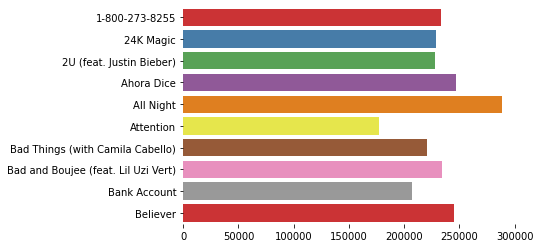

In [ ]:
plt.figure()
sb.barplot(x = counts, y = labels, palette = 'Set1')
sb.despine(left = True, bottom = True)

##**Most Popular Artists/Bands**##

For the next task, we'll count how many times each artist or a band appears in reference with the Time Signature. Again, we'll count how many times the same artist appears.

In [ ]:
#count how many rows we have by artist name, we show only the ten more popular artist 
ten_pop_artists  = dataset.groupby(['artists'])['duration_ms'].count().reset_index().sort_values(['duration_ms', 'artists'], 
                                                                                                ascending = [0,1])

In [ ]:
ten_pop_artists.rename(columns = {'artists': 'Artists/Bands', 'duration_ms': 'Time Signature'}, inplace = True)

In [ ]:
ten_pop_artists = ten_pop_artists[:10]
ten_pop_artists

,Artists/Bands,Time Signature
23,Ed Sheeran,4
70,The Chainsmokers,4
21,Drake,3
55,Martin Garrix,3
7,Bruno Mars,2
9,Calvin Harris,2
15,Clean Bandit,2
16,DJ Khaled,2
30,Imagine Dragons,2
40,Kendrick Lamar,2


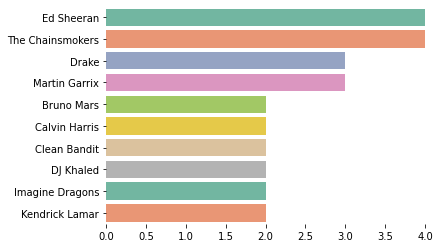

In [ ]:
plt.figure()
labels = ten_pop_artists['Artists/Bands'].tolist()
counts = ten_pop_artists['Time Signature'].tolist()
sb.barplot(x=counts, y=labels, palette='Set2')
sb.despine(left=True, bottom=True)

##**Listen count by user**##

We can also get some other information from the feature listen_count. We will answer the following questions:

###**What was the maximum time the same user listen to a same song?**###

In [ ]:
duration_ms = pd.DataFrame(dataset.groupby('duration_ms').size(), columns=['count'])

In [ ]:
print(f"The maximum time the same user listened to the same songs was: {duration_ms.reset_index(drop=False)['duration_ms'].iloc[-1]}")

The maximum time the same user listened to the same songs was: 343150.0


###**How many times on average the same user listen to a same song?**###

In [ ]:
print(f"On average, a user listen to the same song {dataset['duration_ms'].mean()} times")

On average, a user listen to the same song 218387.28 times


We can also check the distribution of our listen count which is in duration_ms

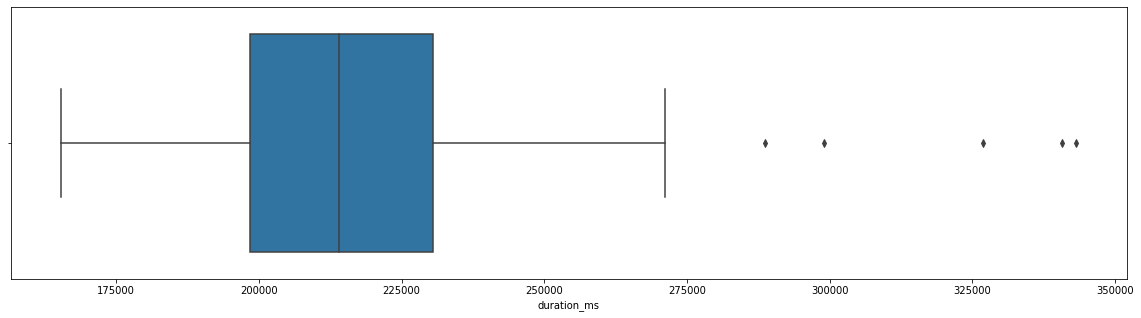

In [ ]:
plt.figure(figsize=(20, 5)) #distribution of duration_ms
sb.boxplot(x='duration_ms', data = dataset);

###**What are the most frequent number of times a user listen to the same song?**###

In [ ]:
#duration_ms_temp = duration_ms[duration_ms['count'] > 50].reset_index(drop=False)

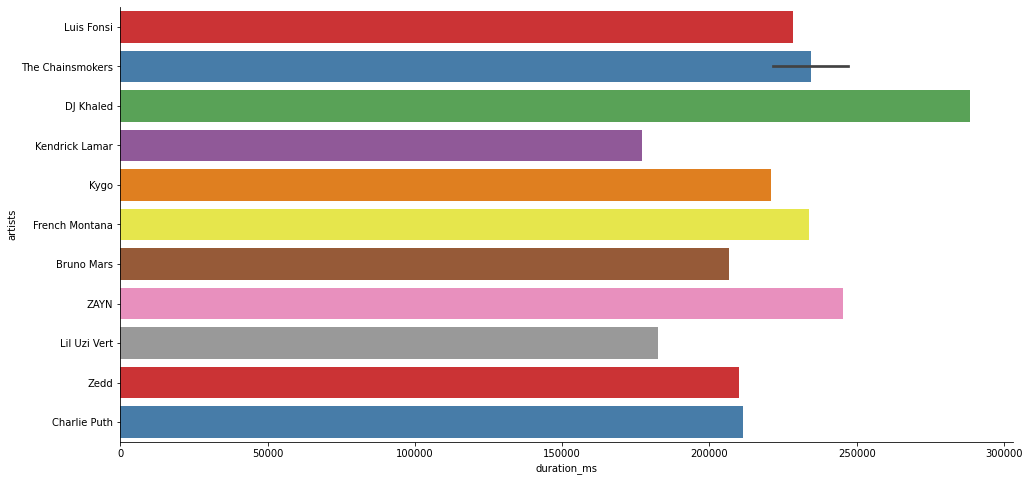

In [ ]:
plt.figure(figsize=(16, 8))
sb.barplot(x = 'duration_ms', y = 'artists', palette='Set1', data = dataset.iloc[2:14])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

##**Plotting the Data with Graphs**##

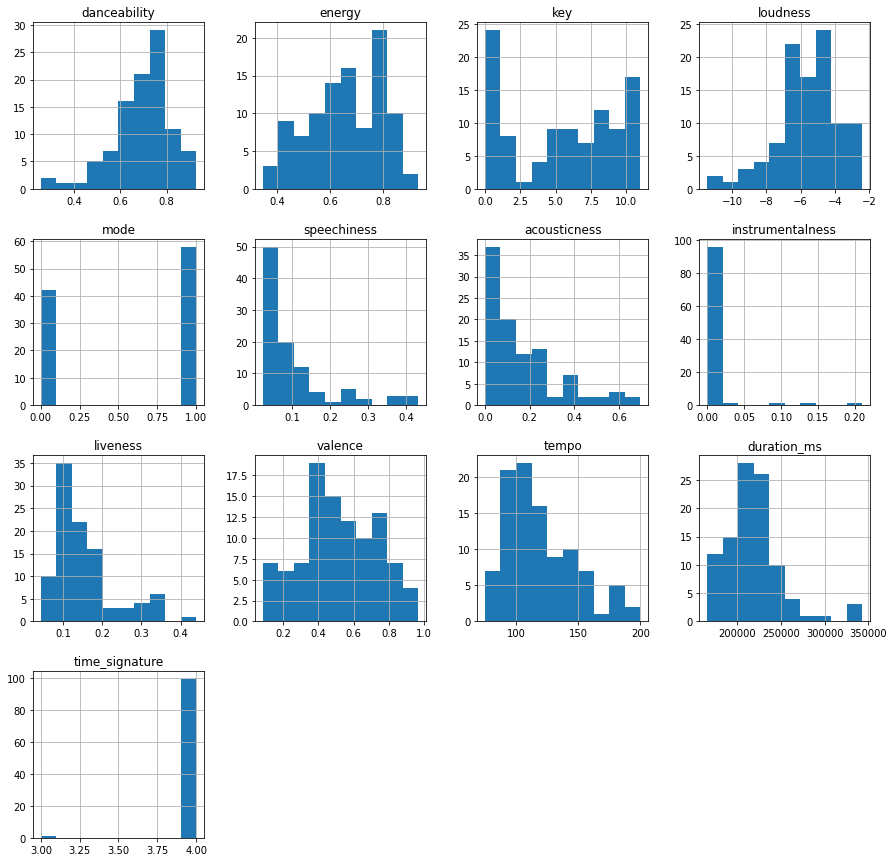

In [ ]:
dataset.hist(figsize = (15,15))
plt.show()

In [ ]:
import random
mylist = dataset.iloc[:1]
random.shuffle(mylist)

In [ ]:
print(mylist)

                      id          name  ... duration_ms  time_signature
0  7qiZfU4dY1lWllzX7mPBI  Shape of You  ...    233713.0             4.0

[1 rows x 16 columns]


In [ ]:
X = dataset.iloc[:, [3,4]].values
print(X)

In [ ]:
y = dataset.iloc[:, [3,5]].values
print(y)

##**Applying K-Means Clustering and Visualising predicted result diagramtically**##

In [ ]:
from sklearn.cluster import KMeans

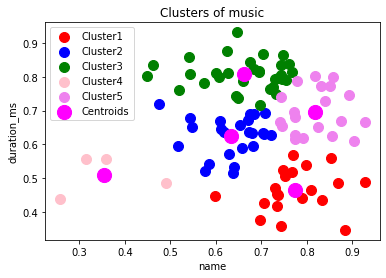

In [ ]:
wcss = []
for i in range(1,10):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 100, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s = 100, c = 'pink', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s = 100, c = 'violet', label = 'Cluster5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200, c = 'magenta', label = 'Centroids')
plt.title('Clusters of music');
plt.xlabel('name')
plt.ylabel('duration_ms')
plt.legend()
plt.show()